In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [3]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

In [4]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

##EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


<AxesSubplot:xlabel='type', ylabel='count'>

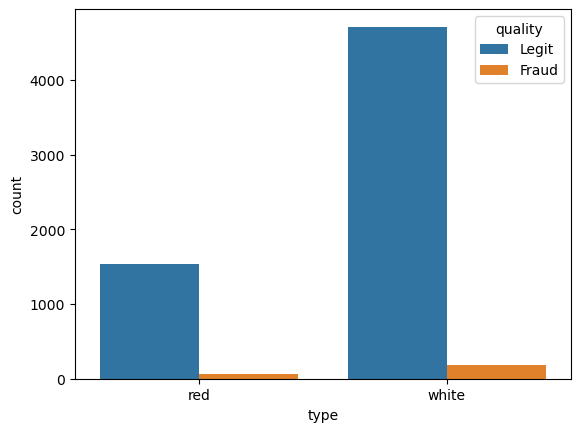

In [6]:
sns.countplot(x='type',hue='quality',data=df)


In [7]:
red  = df[df['type']=='red']
white = df[df['type']=='white']

In [8]:
100*len(red[red['quality']== 'Fraud'])/len(red)

3.9399624765478425

In [9]:
100*len(white[white['quality']== 'Fraud'])/len(white)

3.736218864842793

In [10]:
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0


In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'Fraud'],
      dtype='object')

In [12]:
df1 = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'Fraud']]
df1.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

<AxesSubplot:>

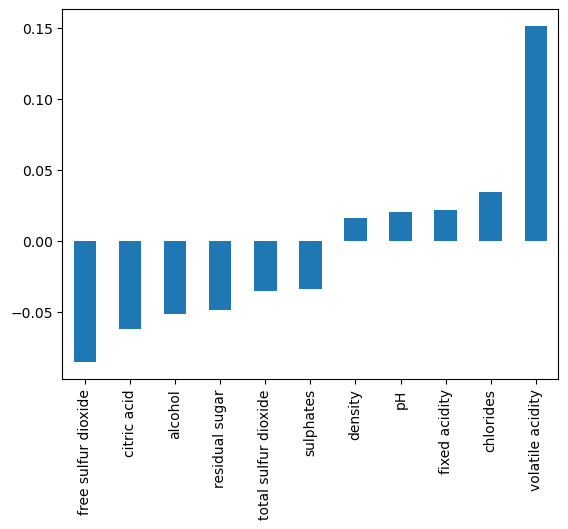

In [13]:
df1.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

'type' Column to dummy variables

In [14]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [15]:
df = df.drop('Fraud',axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [16]:
x = df.drop('quality',axis=1)
y = df['quality']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.1, random_state=50)

In [18]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()
sc_x_train = sc.fit_transform(x_train)
sc_x_test = sc.transform(x_test)

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC(class_weight='balanced')

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'C':[0.001,0.01,0.1,0.5,0.8,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [39]:
grid.fit(sc_x_train,y_train,)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.8, 1],
                         'gamma': ['scale', 'auto']})

In [40]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [41]:
y_pred = grid.predict(sc_x_test)

In [42]:
y_pred

array(['Legit', 'Fraud', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Legit',
       'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Fraud', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit',
       'Fraud', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit',
       'Fraud', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit',
       'Fraud', 'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Fraud',
       'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Fraud', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Legit',
       'Legit', 'Legit', 'Legit', 'Fraud', 'Fraud', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit',
       'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Fraud',
       'Legit', 'Leg

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
confusion_matrix(y_test,y_pred)

array([[  9,   9],
       [105, 527]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.08      0.50      0.14        18
       Legit       0.98      0.83      0.90       632

    accuracy                           0.82       650
   macro avg       0.53      0.67      0.52       650
weighted avg       0.96      0.82      0.88       650



### conclusion

1 My dataset is unbalanced
2 performing chemical analysis is not a right way of detecting your wine being a fraud or legit